In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
delhi = pd.read_csv('datafile/delhi.csv')
print(delhi.year.min(), delhi.year.max())
print(delhi.avg_temp_delhi.min(), delhi.avg_temp_delhi.max())
print(delhi.info())
delhi.head()

1796 2013
23.7 26.71
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            218 non-null    int64  
 1   avg_temp_delhi  201 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.5 KB
None


,year,avg_temp_delhi
0,1796,25.03
1,1797,26.71
2,1798,24.29
3,1799,25.28
4,1800,25.21


#### As observed, data has total 218 years but avg_temp_delhi is available only for 201 years. So, 17 datapoints is missing. We have data from 1796 to 2013. Mininum temperature is 23.7 and maximum temperature is 26.71

In [3]:
global_temp = pd.read_csv('datafile/global.csv')
print(global_temp.year.min(), global_temp.year.max())
print(global_temp.avg_temp_global.min(), global_temp.avg_temp_global.max())
print(global_temp.info())
global_temp.head()

1750 2015
5.78 9.83
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             266 non-null    int64  
 1   avg_temp_global  266 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB
None


,year,avg_temp_global
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


#### As observed, global data has total 266 years. There are no missing values. We have data from 1750 to 2015. Mininum temperature is 5.78 and maximum temperature is 9.83

### Combining datasets

In [4]:
df = pd.merge(global_temp, delhi, on = 'year', how = 'outer')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 0 to 265
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             266 non-null    int64  
 1   avg_temp_global  266 non-null    float64
 2   avg_temp_delhi   201 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 8.3 KB
None


,year,avg_temp_global,avg_temp_delhi
0,1750,8.72,NaN
1,1751,7.98,NaN
2,1752,5.78,NaN
3,1753,8.39,NaN
4,1754,8.47,NaN


#### Filtering cases where we have data available for both city and global

In [10]:
df.dropna(inplace = True)
df.to_csv('df.csv', index = False)
print(df.year.min(), df.year.max())
print(df.info())
df.head()

1805 2013
<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 55 to 263
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          192 non-null    int64  
 1   avg_temp_global               192 non-null    float64
 2   avg_temp_delhi                192 non-null    float64
 3   global_temp_moving_avg        192 non-null    float64
 4   delhi_temp_moving_avg         192 non-null    float64
 5   difference_in_temperature     192 non-null    float64
 6   difference_in_moving_average  192 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 12.0 KB
None


,year,avg_temp_global,avg_temp_delhi,global_temp_moving_avg,delhi_temp_moving_avg,difference_in_temperature,difference_in_moving_average
55,1805,8.56,25.30,8.551,25.273,16.74,16.722
56,1806,8.43,25.22,8.567,25.292,16.79,16.725
57,1807,8.28,24.97,8.544,25.118,16.69,16.574
63,1813,7.74,24.56,8.451,25.145,16.82,16.694
64,1814,7.59,23.73,8.359,24.990,16.14,16.631


### Calculating 10 year moving average

In [6]:
N = 10
df['global_temp_moving_avg'] = df.iloc[:,1].rolling(window=N).mean()
df['delhi_temp_moving_avg'] = df.iloc[:,2].rolling(window=N).mean()
df['difference_in_temperature'] = df['avg_temp_delhi'] - df['avg_temp_global']
df['difference_in_moving_average'] = df['delhi_temp_moving_avg'] - df['global_temp_moving_avg']

0.13514949033754778


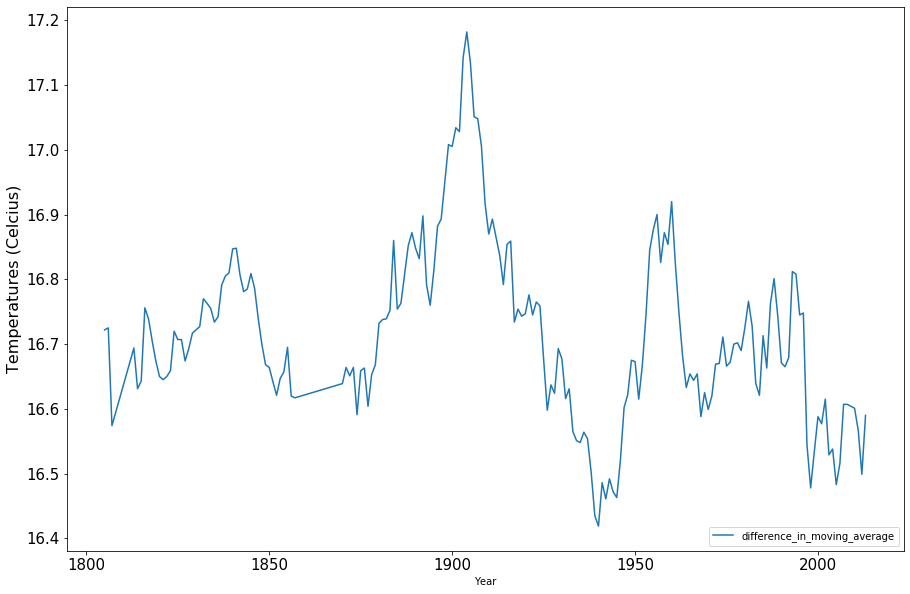

In [25]:
plt.figure(figsize=[15,10])
plt.plot(df['year'], df['difference_in_moving_average'],label='difference_in_moving_average')
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.xlabel('Year')
plt.ylabel('Temperatures (Celcius)', fontsize=16)
plt.savefig('difference_in_moving_average.png', dpi=100)
x = np.std(df['difference_in_moving_average'])
print(x)
plt.legend(loc=4)

### Plots

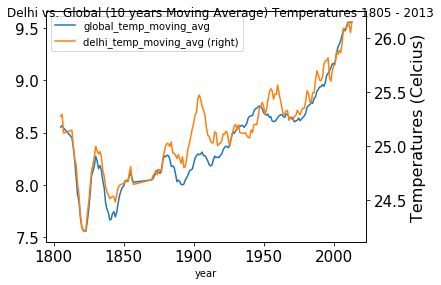

In [23]:
ax = df.plot(x = 'year', y = 'global_temp_moving_avg', label='global_temp_moving_avg')
ax2 = df.plot(x = 'year', y = 'delhi_temp_moving_avg', secondary_y=True, label='delhi_temp_moving_avg' , ax=ax)
# fig = plt.figure()
plt.suptitle('Delhi vs. Global (10 years Moving Average) Temperatures 1805 - 2013')
plt.xlabel('Year')
plt.ylabel('Temperatures (Celcius)', fontsize=16)
plt.savefig('moving_average.png', dpi=100)
plt.tight_layout()
plt.show()